In [113]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
seeds_train = pd.read_csv( "/content/gdrive/MyDrive/datasets/seeds_train.csv")
df_test = pd.read_csv( "/content/gdrive/MyDrive/datasets/seeds_test.csv" )
print(len(seeds_train))
print(len(df_test))

display(seeds_train.head())

168
41


,14.84,2.221,1
0,14.09,2.699,1
1,13.94,2.259,1
2,14.99,1.355,1
3,14.49,3.586,1
4,14.10,2.750,1


### Prepare the data

In [115]:

# clean the training set
first_raw_train  = pd.DataFrame({"first_feature":14.84, "fifth_feature" : 2.221, "label": 1} ,index= [0])
seeds_train.columns = ['first_feature' ,'fifth_feature' ,'label']
training = shuffle(seeds_train)
df_train = pd.concat([first_raw_train , training])
df_train.reset_index(drop = True, inplace= True)

# clean the  test set 
df_test.columns = ['first_feature' ,'fifth_feature' ,'label']

features = df_train.values[: , 0:2]
labels = df_train.values[: ,-1]
features_test = df_test.values[: ,0:2]
label_test = df_test.values[: , -1]
display(df_train.head())

,first_feature,fifth_feature,label
0,14.84,2.221,1
1,15.25,1.969,1
2,14.77,1.999,1
3,16.57,2.144,2
4,13.95,5.995,3


In [116]:
def prepareDataset(X, y, cls_remove=None):
   cls = [1, 2, 3]
   if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X, y)):
       if y[index] != cls_remove:
         features.append(feat)
         labels.append(label)
     cls.pop(cls_remove-1)
   else:
     features = X
     labels = y
   return np.array(features), np.array(labels), cls

In [117]:
def plotData(features, labels, cls, class_names,title):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = title
 # "Seeds Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel('First Feature')
  plt.ylabel('Fifth Feature')
  plt.legend()

In [118]:
def plotRegions(model,X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [119]:
def label_binary(labels , pos_cls):
  ylabels = []
  lb = preprocessing.LabelBinarizer(neg_label = -1, pos_label = 1)
  lb.fit([pos_cls])
  y_label_bin = lb.transform(labels)
  for i in range(len(y_label_bin)):
    ylabels.append(y_label_bin[i][0])
  return np.array(ylabels)

In [120]:
X_train, y_train, cls= prepareDataset(features, labels, 1)
X_test, y_test, cls= prepareDataset(features_test, label_test, 1)

# 1- SVM


 testing accuracy :   1.0 

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:

[[17  0]
 [ 0 12]]
----------------------------------------------------------------------------------------------


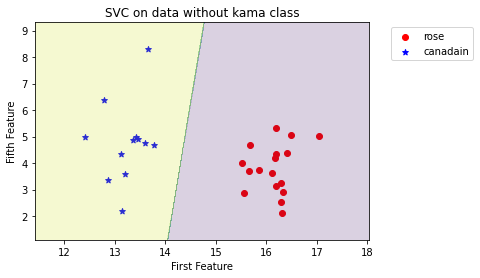

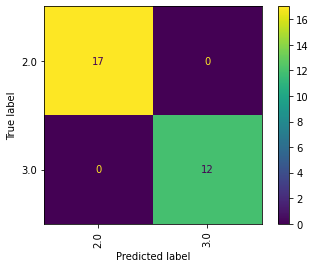

In [121]:
from sklearn import svm
model = svm.SVC(kernel='linear' ,probability  =True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("\n testing accuracy :  "  ,test_accuracy,"\n")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
print("----------------------------------------------------------------------------------------------")
plotData(X_test, y_test, [ 2 , 3], {1:'kama', 2: 'rose', 3: 'canadain'} ,"SVC on data without kama class");
plotRegions(model , X_test);
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
plt.show()

plot_confusion_matrix(model, X_test, y_test, xticks_rotation='vertical');

# 2- precptron 


 testing accuracy :   1.0 

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:

[[17  0]
 [ 0 12]]
----------------------------------------------------------------------------------------------


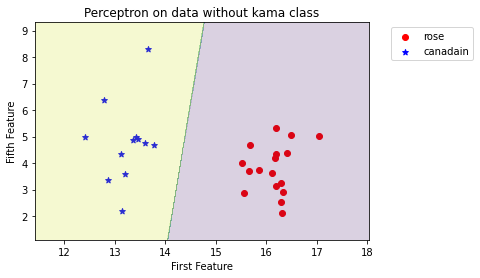

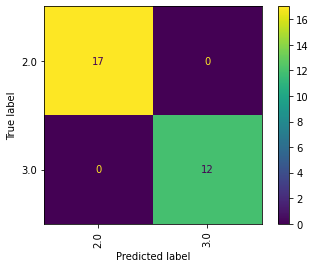

In [122]:
perc_model = Perceptron(n_iter_no_change=100, max_iter=5000)
perc_model.fit(X_train, y_train)
y_pred = perc_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("\n testing accuracy :  "  ,test_accuracy,"\n")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
print("----------------------------------------------------------------------------------------------")
plotData(X_test, y_test, [ 2 , 3], {1:'kama', 2: 'rose', 3: 'canadain'} ,"Perceptron on data without kama class");
plotRegions(model , X_test);
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
plt.show()
plot_confusion_matrix(perc_model, X_test, y_test, xticks_rotation='vertical');

# Part 3
### Build OvR-Perceptron and OvR-SVM and test on Seeds testing dataset (which contains 3 classes).

In [123]:
def buid_plot_model(model,model_name ,X_train, y_train, X_test, y_test, positive_cls ,plot_title):

  y_train_bin = label_binary(y_train,pos_cls=positive_cls)
  y_test_bin = label_binary(y_test, positive_cls)
  model.fit(X_train, y_train_bin)
  y_pred_bin= model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)
  test_acc = accuracy_score(y_test_bin, y_pred_bin)
  print("\n testing accuracy :  "  ,test_acc,"\n")
  print(classification_report(y_test_bin, y_pred_bin))
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test_bin, y_pred_bin))
  print("----------------------------------------------------------------------------------------------")
  if positive_cls==1 :
      plotData(X_test, y_test_bin, [1,-1], {1:'kama', -1: 'rose & candain', -1: 'rose & candain'}, plot_title);
  elif positive_cls == 2 :
      plotData(X_test, y_test_bin, [1,-1], {-1:'kama & canadain', 1: 'rose', -1: 'kama & canadain'}, plot_title);
  elif positive_cls == 3 :
    plotData(X_test, y_test_bin, [1,-1], {-1:'kama & rose', -1: 'kama & rose', 1: 'canadain'}, plot_title);
  plotRegions(model , X_test);
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
  plt.show()
  plot_confusion_matrix(model, X_test, y_test_bin, values_format = 'd');
  return test_acc ,y_pred_bin  , y_pred_prob 

In [124]:
X_train_all, y_train_all, cls= prepareDataset(features, labels, cls_remove=None)
X_test_all, y_test_all, cls= prepareDataset(features_test, label_test, cls_remove=None)

# 3.1 - SVM with OVR


 testing accuracy :   0.9024390243902439 

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93        29
           1       0.90      0.75      0.82        12

    accuracy                           0.90        41
   macro avg       0.90      0.86      0.88        41
weighted avg       0.90      0.90      0.90        41


Confusion Matrix:

[[28  1]
 [ 3  9]]
----------------------------------------------------------------------------------------------


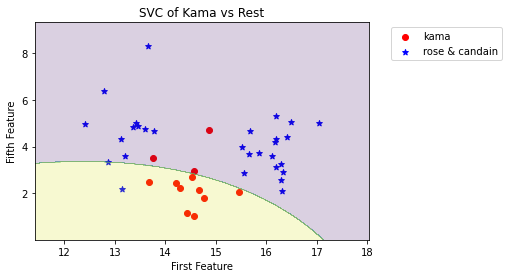

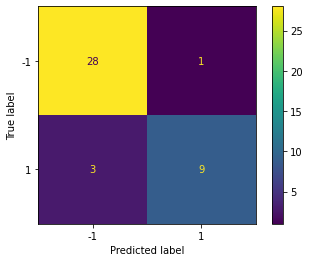

In [125]:
svm_ovr1 = svm.SVC(decision_function_shape='ovr', probability= True)
svm_ovr1_acc  ,y_pred_svm1 , y_prob_svm1 = buid_plot_model(svm_ovr1,'svm',X_train_all,y_train_all,X_test_all,y_test_all, 1 ,"SVC of Kama vs Rest")


 testing accuracy :   1.0 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        17

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


Confusion Matrix:

[[24  0]
 [ 0 17]]
----------------------------------------------------------------------------------------------


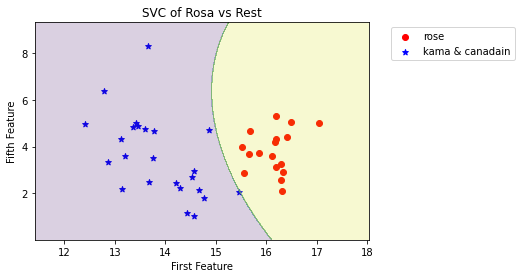

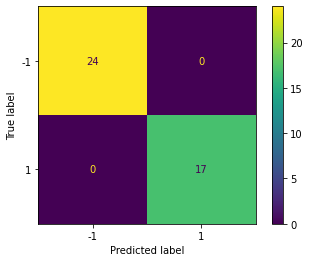

In [126]:
svm_ovr2 = svm.SVC(decision_function_shape='ovr',probability= True)
svm_ovr2_acc ,y_pred_svm2 , y_prob_svm2 = buid_plot_model(svm_ovr2,'svm',X_train_all,y_train_all,X_test_all,y_test_all, 2,"SVC of Rosa vs Rest")


 testing accuracy :   0.975609756097561 

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        29
           1       1.00      0.92      0.96        12

    accuracy                           0.98        41
   macro avg       0.98      0.96      0.97        41
weighted avg       0.98      0.98      0.98        41


Confusion Matrix:

[[29  0]
 [ 1 11]]
----------------------------------------------------------------------------------------------


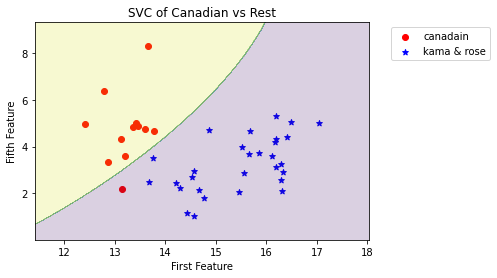

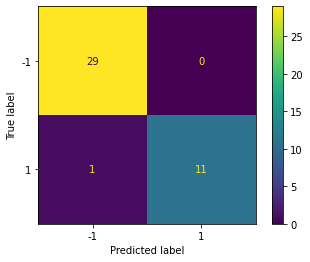

In [127]:
svm_ovr3 = svm.SVC(decision_function_shape='ovr', probability= True)
svm_ovr3_acc,y_pred_svm3 , y_prob_svm3 = buid_plot_model(svm_ovr3,'svm',X_train_all,y_train_all,X_test_all,y_test_all, 3 ,"SVC of Canadian vs Rest")

# 3.2 -  Perceptron With OVR


 testing accuracy :   0.8536585365853658 

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90        29
           1       0.75      0.75      0.75        12

    accuracy                           0.85        41
   macro avg       0.82      0.82      0.82        41
weighted avg       0.85      0.85      0.85        41


Confusion Matrix:

[[26  3]
 [ 3  9]]
----------------------------------------------------------------------------------------------


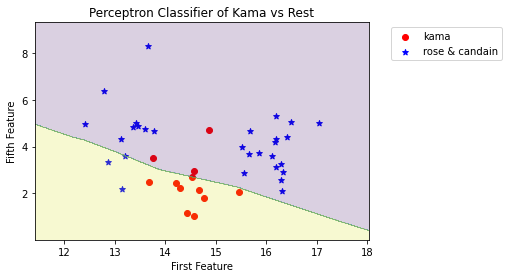

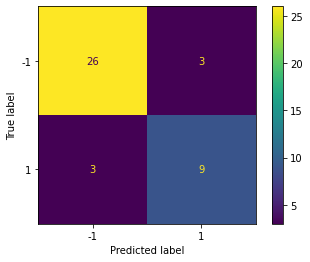

In [128]:
perc1 = Perceptron(alpha=.0001,n_iter_no_change=1000, max_iter=5000)
perc_ovr1 = CalibratedClassifierCV(perc1 , method='isotonic')
perc_ovr1_acc ,y_pred_perc1 , y_prob_perc1= buid_plot_model(perc_ovr1,"perc",X_train_all,y_train_all,X_test_all,y_test_all, 1, "Perceptron Classifier of Kama vs Rest")


 testing accuracy :   0.975609756097561 

              precision    recall  f1-score   support

          -1       1.00      0.96      0.98        24
           1       0.94      1.00      0.97        17

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.98        41
weighted avg       0.98      0.98      0.98        41


Confusion Matrix:

[[23  1]
 [ 0 17]]
----------------------------------------------------------------------------------------------


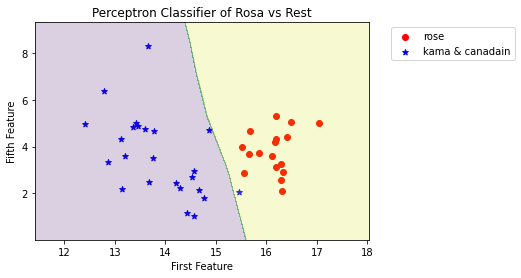

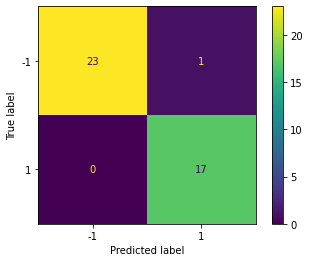

In [129]:
perc2 = Perceptron(alpha=.0001,n_iter_no_change=1000, max_iter=5000)
perc_ovr2 = CalibratedClassifierCV(perc2 , method='isotonic')
perc_ovr2_acc ,y_pred_perc2 , y_prob_perc2 = buid_plot_model(perc_ovr2,'perc',X_train_all,y_train_all,X_test_all,y_test_all, 2 , "Perceptron Classifier of Rosa vs Rest")


 testing accuracy :   0.975609756097561 

              precision    recall  f1-score   support

          -1       1.00      0.97      0.98        29
           1       0.92      1.00      0.96        12

    accuracy                           0.98        41
   macro avg       0.96      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41


Confusion Matrix:

[[28  1]
 [ 0 12]]
----------------------------------------------------------------------------------------------


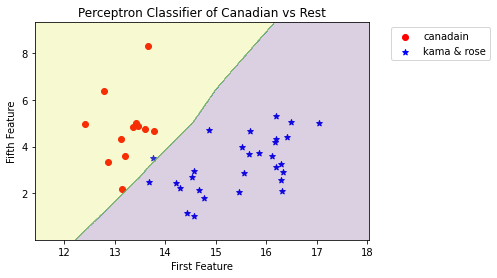

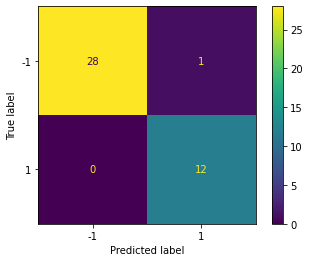

In [130]:
perc3 = Perceptron(alpha=.0001,n_iter_no_change=1000, max_iter=5000)
perc_ovr3 = CalibratedClassifierCV(perc3 , method='isotonic')
perc_ovr3_acc ,y_pred_perc3 , y_prob_perc3 = buid_plot_model(perc_ovr3,'prec',X_train_all,y_train_all,X_test_all,y_test_all, 3, "Perceptron Classifier of Canadian vs Rest")

# SVM With OVR (3 classes)

0.9512195121951219


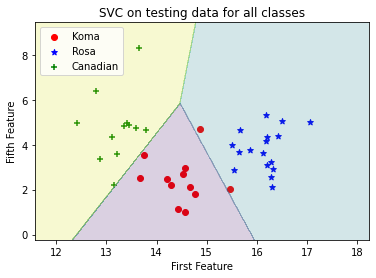


Classification Report:

              precision    recall  f1-score   support

         1.0       1.00      0.83      0.91        12
         2.0       0.89      1.00      0.94        17
         3.0       1.00      1.00      1.00        12

    accuracy                           0.95        41
   macro avg       0.96      0.94      0.95        41
weighted avg       0.96      0.95      0.95        41


Confusion Matrix:

[[10  2  0]
 [ 0 17  0]
 [ 0  0 12]]


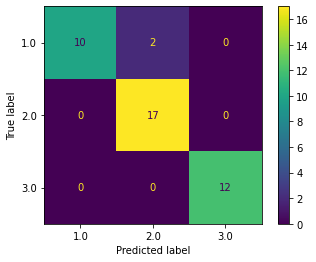

In [131]:
class_names= {1: 'Koma', 2: 'Rosa ', 3: 'Canadian'}
cls_new = [1, 2, 3]
plotData(X_test_all, y_test_all, cls_new, class_names, "SVC on testing data for all classes")
x_model = svm.SVC(kernel='linear', decision_function_shape='ovr')
x_model.fit(X_train_all, y_train_all)
y_pred = x_model.predict(X_test_all)
print(accuracy_score(y_test_all, y_pred))
plotRegions(x_model, X_train_all)
plt.legend(loc="upper left")
plt.show()
print('\nClassification Report:\n')
print(classification_report(y_test_all, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test_all, y_pred))
plot_confusion_matrix(x_model, X_test_all, y_test_all)

# Perceptron With OVR (3 classes)

0.7317073170731707


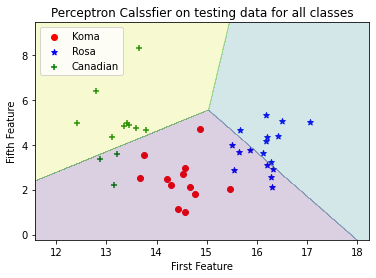


Classification Report:

              precision    recall  f1-score   support

         1.0       0.52      1.00      0.69        12
         2.0       1.00      0.53      0.69        17
         3.0       1.00      0.75      0.86        12

    accuracy                           0.73        41
   macro avg       0.84      0.76      0.75        41
weighted avg       0.86      0.73      0.74        41


Confusion Matrix:

[[12  0  0]
 [ 8  9  0]
 [ 3  0  9]]


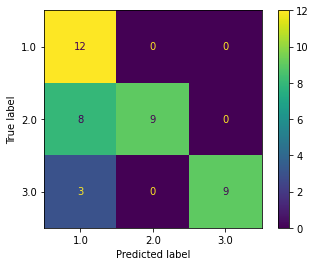

In [132]:
class_names= {1: 'Koma', 2: 'Rosa ', 3: 'Canadian'}
cls_new = [1, 2, 3]
plotData(X_test_all, y_test_all, cls_new, class_names ,"Perceptron Calssfier on testing data for all classes")
xx_model = OneVsRestClassifier(Perceptron(alpha=.0001,n_iter_no_change=1000, max_iter=15000))
xx_model.fit(X_train_all, y_train_all)
y_pred = xx_model.predict(X_test_all)
print(accuracy_score(y_test_all, y_pred))
plotRegions(xx_model, X_train_all)
plt.legend(loc="upper left")
plt.show()
print('\nClassification Report:\n')
print(classification_report(y_test_all, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test_all, y_pred))
plot_confusion_matrix(xx_model, X_test_all, y_test_all)

# 4. Use argmax to aggregate confidence scores and obtain the final label and obtain the performance
 (i.e.,confusion matrix, accuracy, plotting correct and wrong prediction points) of OvR-Perceptron (5 marks) and
OvR-SVM (5 marks)
Accuracy (1 marks for each model)
Confusion Matrix (2 marks for each model)
Plotting correct and wrong prediction points (2 marks for each model)

# 4.1 -  SVM models argmax aggregate


### Apply the Agrmax to the confidance score for SVM models 

---



In [133]:

predicts = np.argmax([y_prob_svm1[:,1],y_prob_svm2[:,1],y_prob_svm3[:,1]], axis=0)
predictions = predicts + 1 
svm_y_label= np.copy(y_test_all)
i=-1
number_of_worng_prediction_svm= []
for input, prediction, label in zip(X_test_all, predictions , y_test_all):
  i+=1
  if prediction != label:
    svm_y_label[i]=4
    data_point= np.stack(input)
    number_of_worng_prediction_svm.append(data_point)

    print(data_point, 'has been classified as ', prediction, 'and should be ', label) 

print('\n Number of Wrong Predictions of Argmax for SVM  is : ' ,len(number_of_worng_prediction_svm),'\n')


[13.15   2.201] has been classified as  1 and should be  3.0
[14.86   4.711] has been classified as  2 and should be  1.0
[15.46  2.04] has been classified as  2 and should be  1.0

 Number of Wrong Predictions of Argmax for SVM  is :  3 



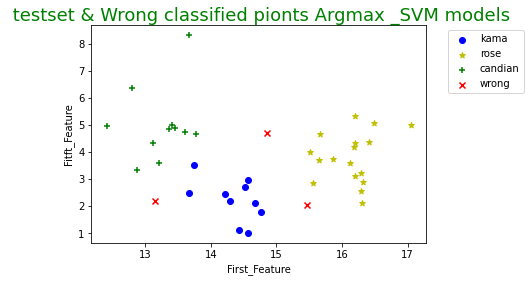


Classification Report:

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95        10
         2.0       0.89      1.00      0.94        17
         3.0       1.00      1.00      1.00        11
         4.0       0.00      0.00      0.00         3

    accuracy                           0.93        41
   macro avg       0.70      0.75      0.72        41
weighted avg       0.86      0.93      0.89        41


Confusion Matrix:

[[10  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 1  2  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
features=X_test_all
lab = svm_y_label
classes=[1,2,3,4]
class_names={ 1: 'kama', 2: 'rose', 3: "candian" , 4:'wrong' }

colors = ['b', 'y', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(classes)):
  plt.scatter(features[lab == classes[class_index], 0], 
              features[lab == classes[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[classes[class_index]])


Title = " testset & Wrong classified pionts Argmax _SVM models" 
plt.title(Title,c='g',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('First_Feature' )
plt.ylabel('Fitft_Feature' )

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

print('\nClassification Report:\n' )
print(classification_report(lab, predictions))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(lab, predictions))

# 4.2 - Perceptron Models Agrmax aggregate

### Apply the Agrmax to the confidance score for preceptron models 

---




In [135]:
#Applying argmax on the confidance score  of the 3 preceptron models prediction
predicts_2 = np.argmax([y_prob_perc1[:,1],y_prob_perc2[:,1],y_prob_perc3[:,1]], axis=0)
predictions_2 = predicts_2 + 1
#Showing were is the wrong prediction
number_of_wrong_prediction_argmax_prec  = []

svm_y_2= np.copy(y_test_all)
i=-1
for input_2, prediction_2, label_2 in zip(X_test_all, predictions_2, y_test_all):
  i+=1
  if prediction_2 != label_2:
    svm_y_2[i]=4
    data_point_2= np.stack(input_2)
    number_of_wrong_prediction_argmax_prec.append(data_point_2)
    print(data_point_2, 'has been classified as ', prediction_2, 'and should be ', label_2) 

print('\n Number of Wrong Predictions of Argmax for SVM  is : ' ,len(number_of_wrong_prediction_argmax_prec),'\n')


[13.75   3.533] has been classified as  3 and should be  1.0
[13.15   2.201] has been classified as  1 and should be  3.0
[14.86   4.711] has been classified as  2 and should be  1.0
[15.46  2.04] has been classified as  2 and should be  1.0

 Number of Wrong Predictions of Argmax for SVM  is :  4 



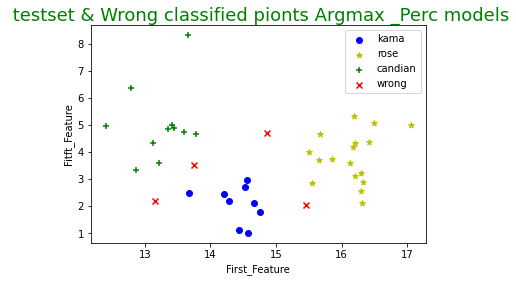


Classification Report:

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95         9
         2.0       0.89      1.00      0.94        17
         3.0       0.92      1.00      0.96        11
         4.0       0.00      0.00      0.00         4

    accuracy                           0.90        41
   macro avg       0.68      0.75      0.71        41
weighted avg       0.81      0.90      0.86        41


Confusion Matrix:

[[ 9  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 1  2  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
features= X_test_all
lab  = svm_y_2
classes=[1,2,3,4]
class_names={ 1: 'kama', 2: 'rose', 3: "candian" , 4:'wrong' }

colors = ['b', 'y', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(classes)):
  plt.scatter(features[lab == classes[class_index], 0], 
              features[lab == classes[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[classes[class_index]])


Title = " testset & Wrong classified pionts Argmax _Perc models" 
plt.title(Title,c='g',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('First_Feature' )
plt.ylabel('Fitft_Feature' )
plt.legend()
plt.show()


print('\nClassification Report:\n' )
print(classification_report(lab, predictions_2))
print('\nConfusion Matrix:\n' )
print(confusion_matrix(lab, predictions_2))

# 5 - Alternative aggregation strategy instead of existing argmax

##5.1 First Method using XGBoost Classifier

###5.1.1 Apply XGBoost Classifier on SVM (OVR)

In [137]:
df = pd.DataFrame(data={'m1':y_prob_svm1[:,1],
                        'm2':y_prob_svm2[:,1],
                        'm3':y_prob_svm3[:,1],
                        'labels':y_test_all})
y_train =df['labels']
X_train = df.drop('labels', axis=1)
display(df.head())

,m1,m2,m3,labels
0,0.037909,1.000000,0.002596,2.0
1,0.396404,0.978037,0.000382,2.0
2,0.761695,0.071699,0.005300,1.0
3,0.449360,0.006033,0.381331,1.0
4,0.175080,0.901518,0.016182,2.0



Classification Report:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


Confusion Matrix:

[[12  0  0]
 [ 0 17  0]
 [ 0  0 12]]

 Number of Wrong Predictions of Argmax for SVM  is :  0 



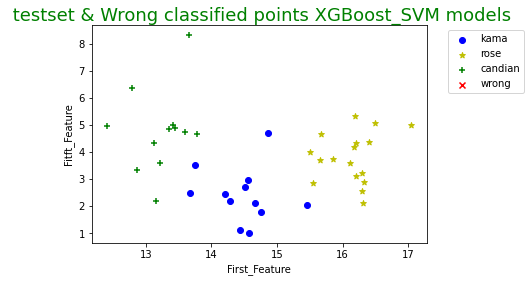

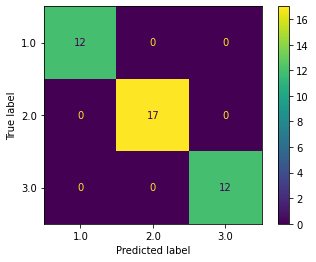

In [138]:
import xgboost as xgb

clf_svm = xgb.XGBClassifier().fit(X_train, y_train)
clf_svm.score(X_train, y_train)
y_pred_xgb_svm = clf_svm.predict(X_train)

print('\nClassification Report:\n')
print(classification_report(y_test_all, y_pred_xgb_svm))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test_all, y_pred_xgb_svm))

xgb_y_label= np.copy(y_test_all)
i=-1

number_of_wrong_prediction_xgb  = []

for input, prediction, label in zip(X_test_all, y_pred_xgb_svm  , y_test_all):
  i+=1
  if prediction != label:
    xgb_y_label[i]=4
    data_point_xgb= np.stack(input)
    number_of_wrong_prediction_xgb.append(data_point_xgb)
    print(data_point_xgb, 'has been classified as ', prediction, 'and should be ', label) 

print('\n Number of Wrong Predictions of Argmax for SVM  is : ' ,len(number_of_wrong_prediction_xgb),'\n')

features=X_test_all
lab = xgb_y_label
classes=[1,2,3,4]
class_names={ 1: 'kama', 2: 'rose', 3: "candian" , 4:'wrong' }

colors = ['b', 'y', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(classes)):
  plt.scatter(features[lab == classes[class_index], 0], 
              features[lab == classes[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[classes[class_index]])


Title = " testset & Wrong classified points XGBoost_SVM models" 
plt.title(Title,c='g',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('First_Feature' )
plt.ylabel('Fitft_Feature' )

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plot_confusion_matrix(clf_svm, X_train, y_test_all);

###5.1.2 Apply XGBoost Classifier on Perceptron (OVR)

In [139]:
df2 = pd.DataFrame(data={'model_1':y_prob_perc1[:,1],'model_2':y_prob_perc2[:,1],
                         'model_3':y_prob_perc3[:,1],
                        'labels':y_test_all})
y_train =df2['labels']
X_train = df2.drop('labels', axis=1)
display(df2.head())

,model_1,model_2,model_3,labels
0,0.010926,1.000000,0.000000,2.0
1,0.331319,1.000000,0.000000,2.0
2,0.780291,0.000000,0.000000,1.0
3,0.397337,0.000000,0.654746,1.0
4,0.100844,0.951821,0.000000,2.0



Classification Report:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


Confusion Matrix:

[[12  0  0]
 [ 0 17  0]
 [ 0  0 12]]

 Number of Wrong Predictions of Argmax for Perc  is :  0 



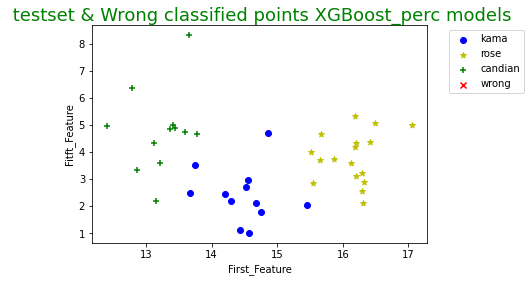

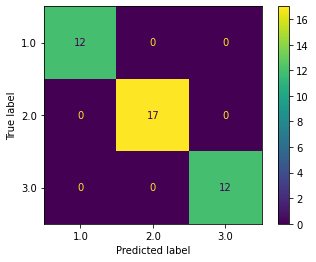

In [140]:
clf_perc = xgb.XGBClassifier().fit(X_train, y_train)
clf_perc.score(X_train, y_train)



import xgboost as xgb

clf_perc = xgb.XGBClassifier().fit(X_train, y_train)
y_pred_xgb_perc = clf_perc.predict(X_train)

print('\nClassification Report:\n')
print(classification_report(y_test_all, y_pred_xgb_perc))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test_all, y_pred_xgb_perc))

xgb_y_label= np.copy(y_test_all)
i=-1

number_of_wrong_prediction_xgb  = []

for input, prediction, label in zip(X_test_all, y_pred_xgb_perc  , y_test_all):
  i+=1
  if prediction != label:
    xgb_y_label[i]=4
    data_point_xgb= np.stack(input)
    number_of_wrong_prediction_xgb.append(data_point_xgb)
    print(data_point_xgb, 'has been classified as ', prediction, 'and should be ', label) 

print('\n Number of Wrong Predictions of Argmax for Perc  is : ' ,len(number_of_wrong_prediction_xgb),'\n')

features=X_test_all
lab = xgb_y_label
classes=[1,2,3,4]
class_names={ 1: 'kama', 2: 'rose', 3: "candian" , 4:'wrong' }

colors = ['b', 'y', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(classes)):
  plt.scatter(features[lab == classes[class_index], 0], 
              features[lab == classes[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[classes[class_index]])


Title = " testset & Wrong classified points XGBoost_perc models" 
plt.title(Title,c='g',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('First_Feature' )
plt.ylabel('Fitft_Feature' )

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plot_confusion_matrix(clf_perc, X_train, y_test_all);



##5.2 second Method using Voting Classifier

###5.2.1 Apply Voting Classifier on SVM (OVR)

SVM (Model 1) : 0.902
SVM (Model 2) : 1.000
SVM (Model 3) : 0.976
Voting Classifier: 1.0


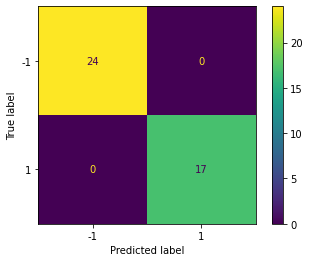

In [141]:
from sklearn.ensemble import VotingClassifier
def aggragate_svm(model1, model2, model3, X_train, y_train, X_test, y_test):
  classifiers = [('SVM (Model 1)', model1, 1), ('SVM (Model 2)', model2, 2), ('SVM (Model 3)', model3, 3)]
  for clf_name, clf, i in classifiers:
    clf.fit(X_train, label_binary(y_train, i))
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(label_binary(y_test, i), y_pred)
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
  classifiers_vc = [('SVM (Model 1)', model1), ('SVM (Model 2)', model2), ('SVM (Model 3)', model3)]
  voting_classifier = VotingClassifier(estimators=classifiers_vc)
  voting_classifier.fit(X_train, label_binary(y_train, 2))
  y_pred = voting_classifier.predict(X_test)
  print('Voting Classifier: {}'.format(accuracy_score(label_binary(y_test, 2), y_pred)))
  plot_confusion_matrix(voting_classifier, X_test, label_binary(y_test, 2), values_format = 'd');

aggragate_svm(svm_ovr1,svm_ovr2,svm_ovr3,X_train_all,y_train_all,X_test_all,y_test_all)

###5.2.2 Apply Voting Classifier on Perceptron (OVR)

Perceptron (Model 1) : 0.854
Perceptron (Model 2) : 0.976
Perceptron (Model 3) : 0.976
Voting Classifier: 0.975609756097561


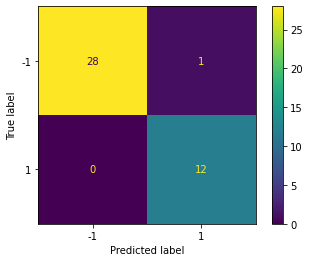

In [142]:
def aggragate_svm(model1, model2, model3, X_train, y_train, X_test, y_test):
  classifiers = [('Perceptron (Model 1)', model1, 1), ('Perceptron (Model 2)', model2, 2), ('Perceptron (Model 3)', model3, 3)]
  for clf_name, clf, i in classifiers:
    clf.fit(X_train, label_binary(y_train, i))
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(label_binary(y_test, i), y_pred)
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
  classifiers_vc = [('Perceptron (Model 1)', model1), ('Perceptron (Model 2)', model2), ('Perceptron (Model 3)', model3)]
  voting_classifier = VotingClassifier(estimators=classifiers_vc)
  voting_classifier.fit(X_train, label_binary(y_train, 3))
  y_pred = voting_classifier.predict(X_test)
  print('Voting Classifier: {}'.format(accuracy_score(label_binary(y_test, 3), y_pred)))
  plot_confusion_matrix(voting_classifier, X_test, label_binary(y_test, 3), values_format = 'd');

aggragate_svm(perc_ovr1,perc_ovr2,perc_ovr3,X_train_all,y_train_all,X_test_all,y_test_all)

##5.3 Third Method Applying XGBoost Classifier on All data (3 Classes)

In [143]:
import xgboost as xgb
xgb_svm_model = xgb.XGBClassifier()
xgb_svm_model.fit(X_train_all, y_train_all)
xgb_y_pred = xgb_svm_model.predict(X_test_all)

In [144]:
xgb_y_label= np.copy(y_test_all)
i=-1

number_of_wrong_prediction_xgb  = []

for input, prediction, label in zip(X_test_all, xgb_y_pred  , y_test_all):
  i+=1
  if prediction != label:
    xgb_y_label[i]=4
    data_point_xgb= np.stack(input)
    number_of_wrong_prediction_xgb.append(data_point_xgb)
    print(data_point_xgb, 'has been classified as ', prediction, 'and should be ', label) 

print('\n Number of Wrong Predictions of Argmax for SVM  is : ' ,len(number_of_wrong_prediction_xgb),'\n')


 Number of Wrong Predictions of Argmax for SVM  is :  0 



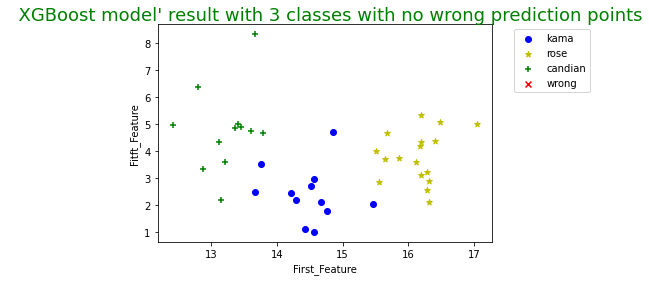

In [145]:
features=X_test_all
lab = xgb_y_label
classes=[1,2,3,4]
class_names={ 1: 'kama', 2: 'rose', 3: "candian" , 4:'wrong' }

colors = ['b', 'y', 'g','r']
markers = ['o', '*', '+','x']
for class_index in range(len(classes)):
  plt.scatter(features[lab == classes[class_index], 0], 
              features[lab == classes[class_index], 1],
              c=colors[class_index], marker=markers[class_index],label=class_names[classes[class_index]])


Title = "  XGBoost model' result with {n} classes with no wrong prediction points" .format(n= len(classes)-1)
plt.title(Title,c='g',size=18,verticalalignment= 'center',horizontalalignment='center')
plt.xlabel('First_Feature' )
plt.ylabel('Fitft_Feature' )

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
